In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import linregress

sys.path.append(os.path.join(os.path.dirname(os.getcwd()))) # add parent folder to path
from flow import Paths
Folder, _, _, Subjects = Paths.ExpData(fig_subfolder = 'pattern_dist')

# Pattern distance change


We computed voxel pattern distance change across trials for four comparisons:

(1) Between two repearting sequences $R_1$ and $R_2$:

$$
\begin{align*}
    d_{x=1} & = distance(R_1^1, R_2^1), \\
    & \dots, \\
    d_{x=12} & = distance(R_1^{12}, R_2^{12})
\end{align*}
$$

where superscript denotes the repetition number and subscript the identity of the sequences.

(2) Within successive presentations of individual repeating sequences $R_i$:

$$
\begin{align*}
    d_{x=n} & = distance(R_i^n, R_i^{n-1}).
\end{align*}
$$

(3) Between the two repeating sequences $R_1$ and $R_2$ and the unique sequences $U_1 \dots U_{12}$ averaged across individual repeating sequences:

$$
\begin{align*}
    d_{x=n} & = \mathbf{E}[distance(R^n_i, U_1), \dots, distance(R^n_i, U_{12})].
\end{align*}
$$

(4) Within presentations of unique sequences $U_1 \dots U_{12}$:

$$
\begin{align*}
    d_{x=n} & = distance(U^n, U^{n-1}).
\end{align*}
$$

This was repeated with three distance measures: cosine, correlation, and euclidean distance.

Code for the analysis:
    https://gitlab.com/kristjankalm/fmri_seq_ltm/-/blob/master/flow/flow.py#L171

Load subject-level data from the analyses: 

In [18]:
# load data
# COLUMN LEGEND
# Label: repetition number within an experiment
# analysis: 
#    dRR_1  -- between two repeating sequences
#    dR_1   -- within successive presentations of individual repeating sequences
#    dUR_01 -- between repeating and unique sequences
#    dU_0   -- within unique sequences
# d: estimated distance
# voi: region id

file_csv = os.path.join(Folder['csv'], 'd_cosine_1.csv') # distance metric: cosine correlation
Z = pd.read_csv(file_csv, index_col=0)
Z

Label analysis labelname         d  Subject  phase  Voi
0          0    dRR_1     SeqId  0.960587        1      1    2
1          1    dRR_1     SeqId  1.091681        1      1    2
2          2    dRR_1     SeqId  1.674598        1      1    2
3          3    dRR_1     SeqId  1.161362        1      1    2
4          4    dRR_1     SeqId  0.784144        1      1    2
...      ...      ...       ...       ...      ...    ...  ...
94013     18     dR_1  TrialNum  0.877511       21      1  147
94014     19     dR_1  TrialNum  0.534077       21      1  147
94015     20     dR_1  TrialNum  0.618829       21      1  147
94016     21     dR_1  TrialNum  0.927713       21      1  147
94017     22     dR_1  TrialNum  1.081621       21      1  147

[94018 rows x 7 columns]

## Group level analysis: calculate slope over distance estimates

Estimated a slope across repetitions (least squares linear regression) to see whether there was a significant change in distance across trials. The figure below displays this for a single participant and region: $y$-axis displays the distance value, while $x$-axis the repetition number.

The individual slope values were then entered into one-sample t-test to see whether the slope values were significantly different from zero across participants. The follwoing notebook performs the group level analysis:
    
    [notebooks/dist.ipynb]

On the plot below: the ROI and subject are random since the plot only visualises the method. 

<Figure size 432x288 with 0 Axes>

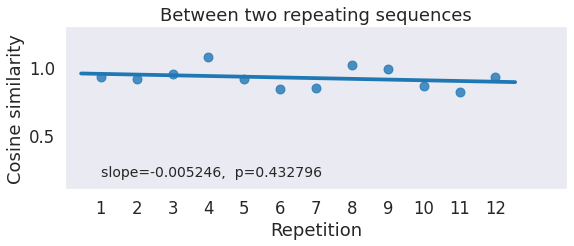

In [16]:
analysis = 'dRR_1' # two repeating sequences
vid = 66 # some random roi
sid = 2 # some random subject

# plotting defaults
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5}); # font and lines optimised for notebook
sns.set_style("dark");
sns.despine();
cmap = sns.cubehelix_palette(light=1, as_cmap=True); # default colourmap for the plots


y = Z[(Z.analysis==analysis) & (Z.Voi.isin([vid])) & (Z.d != 0) & (Z.Subject == sid)]
xl = np.arange(len(y))
lr = linregress(xl, y.d.values)

fig = plt.figure(figsize=(9,3))
ax = sns.regplot(x=xl, y=y.d, ci=None, scatter_kws={"s": 80})
ax.set_ylim([0.1,1.3])
ax.set_xlim([-1,13])
ax.set_xticks(xl)
ax.set_xticklabels(xl+1)
ax.text(0, 0.2, 'slope=' + str.format('{0:.6f}', lr.slope) 
        + ',  p=' + str.format('{0:.6f}', lr.pvalue), fontsize=14)
ax.set_ylabel('Cosine similarity')
ax.set_xlabel('Repetition')
ax.set_title('Between two repeating sequences')
# # # ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, frameon=False, labels=Labels);

plot_name = analysis + ext
fig.savefig(os.path.join(Folder['Fig'], plot_name), bbox_inches = "tight")

### Significant differences in pattern distance functions

Calculate whether there are any significant differences how different distance functions estimate pattern distances.

Load the group-level results:

In [17]:
# load data
file_csv = os.path.join(Folder['Out'], 'dist_results.csv')
P = pd.read_csv(file_csv)
P

Unnamed: 0 Analysis                             Region         p  \
0             0    dRR_1                          Central S  0.066232   
1             1    dRR_1                   Frontal Middle G  0.677885   
2             2    dRR_1                        Calcarine S  0.297319   
3             3    dRR_1             Occipital Inferior G S  0.873014   
4             4    dRR_1                 Occipital Middle G  0.271117   
..          ...      ...                                ...       ...   
163         163     dU_0        Parietal Inferior-Angular G  0.145007   
164         164     dU_0  Parietal Inferior-Supramarginal G  0.271587   
165         165     dU_0                      Postcentral G  0.101799   
166         166     dU_0                      Postcentral S  0.163358   
167         167     dU_0                Temporal Superior S  0.206168   

            t       metric  phase  
0    1.948872    euclidean      1  
1   -0.422192    euclidean      1  
2   -1.071610    euclidean      1  
3   -0.162260    euclidean      1  
4   -1.133469    euclidean      1  
..        ...          ...    ...  
163 -1.519885  correlation      1  
164 -1.132324  correlation      1  
165 -1.719354  correlation      1  
166 -1.450028  correlation      1  
167 -1.308934  correlation      1  

[168 rows x 7 columns]

### Plot differences in distance function estimates

Differences in distance function estimates calculated for all four pattern distance analyses. Y-axis shows the average t-value (error bars represent std) and x-axis four analyses: 

(1) b2R -- between two individual repeating sequences; 

(2) wR -- within repeating sequences; 

(3) bUR -- between the two repeating sequences and the unique sequences; 

(1) wU -- Within unique sequences.

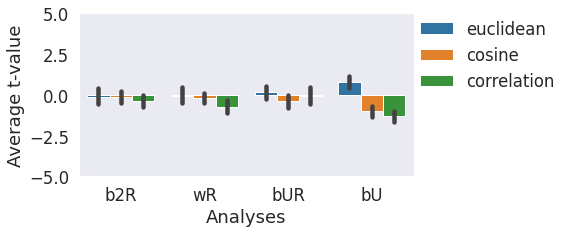

In [13]:
fig = plt.figure(figsize=(6,3))
ax = sns.barplot(x="Analysis", y="t", hue='metric', data=P)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, frameon=False);
ax.set_ylim([-5,5]);
ax.set_ylabel('Average t-value');
ax.set_xlabel('Analyses');
ax.set_xticklabels(['b2R','wR','bUR','bU']);

plot_name = 'dfun' + ext
fig.savefig(os.path.join(Folder['Fig'], plot_name), bbox_inches = "tight")